# Hola Andres!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div

¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General
    
~~Hola, Andrés, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que puedas tenerlos en cuenta para la siguiente entrega.~~
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General #2
    
~~Hola, Andrés, he dejado nuevos comentarios etiquetados con el #2 para que los puedas tener en cuenta para la sigiente entrega.~~
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General #3
    
Hola, Andrés, te felicito por la culminación del proyecto. Muy buen trabajo. </div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Hola, Andrés, no olvides que es importante generar una sección de introducción y descripción del proyecto. ~~
</div>

# Proyecto Sprint #9

## Introducción

## Contexto
Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

## Descripción de los datos
Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv Descarga el dataset

Hypotheses: breves descripciones de las hipótesis
Reach: alcance del usuario, en una escala del uno a diez
Impact: impacto en los usuarios, en una escala del uno al diez
Confidence: confianza en la hipótesis, en una escala del uno al diez
Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.
Datos utilizados en la segunda parte del proyecto

 /datasets/orders_us.csv Descarga el dataset

transactionId: identificador de pedido
visitorId: identificador del usuario que realizó el pedido
date: fecha del pedido
revenue: ingresos del pedido
group: el grupo del test A/B al que pertenece el usuario
/datasets/visits_us.csv Descarga el dataset

date: la fecha
group: grupo del test A/B
visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado

## Análisis preliminar

### Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
import scipy.stats as stats

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo importando las librerías necesarias para el desarrollo del proyecto.
</div>

### Análisis de datos

#### hypotheses

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
new_colnames = []
for name in hypotheses.columns:
    new = name.lower()
    new_colnames.append(new)
hypotheses.columns = new_colnames
hypotheses.info()
print()
print(hypotheses)
print()
print("El número de datos duplicados en hypotheses es ", hypotheses.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3

#### orders

In [3]:
orders = pd.read_csv('/datasets/orders_us.csv')
new_colnames = []
for name in orders.columns:
    new = name.lower()
    new_colnames.append(new)
orders.columns = new_colnames
print()
orders.info()
print()
print(orders.sample(5))
print()
print("El número de datos duplicados en orders es ", orders.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  1197 non-null   int64  
 1   visitorid      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

     transactionid   visitorid        date  revenue group
970     3478707774  2587333274  2019-08-08     60.4     A
556      571224785  3941503500  2019-08-06     80.8     B
433     3312757456   994339272  2019-08-24     90.8     A
607     3384575290   456417264  2019-08-04     30.5     B
913     4132628207  2604694259  2019-08-08     25.4     B

El número de datos duplicados en orders es  0


In [4]:
#usuarios que tienen registros duplicados
dup = orders[orders['visitorid'].duplicated()]
visitordup = dup['visitorid'].unique()
print(visitordup)


[ 237748145 2742574263  457167155 2706377257 3062433592 4256040402
 2038680547 2378935119  199603092  611059232 3967698036 2892265953
 2096506107 2716752286 3332057097 2232111114 3234906277 3803269165
 2686716486 2579882178 1648269707 1738359350  249864742 2458001652
  678354126 3469608676 2397843657 3202540741  351125977 2954449915
 2927087541 1772171838 3951559397 4109358064 2044997962  522292794
 3984495233 3362039251 2780786433 3908431265 3941503500 3957174400
 3379260072 3891541246 2025197455 3935952912 1230306981 1294878855
 4266935830 1614305549 1333886533    8300375 1404560065 2587333274
  477780734 2108163459 2988190573 1617417821 1668030113 1959144690
 2744017357  366673373 3717692402 4186807279 3766097110 1801183820
 1316129916 1602967004  393266494 3077396270 2733145037 3941795274
  406208401 2600415354  232979603 4120364173 3972127743 1404934699
 3656415546 4134830387 4069496402 2306096143  276558944 2366521417
 1985475298  759473111 2654030115 1637811943  818047933 396364

In [5]:
# mostrar registros de usuarios duplicados 
for i in visitordup:
    print(orders[orders['visitorid'] == i])


      transactionid  visitorid        date  revenue group
27       1630050528  237748145  2019-08-15    120.2     B
41       2594268419  237748145  2019-08-15     20.8     A
590      3702128013  237748145  2019-08-20     20.8     A
716       972407388  237748145  2019-08-27     10.2     A
1097     3357467820  237748145  2019-08-12     10.2     A
     transactionid   visitorid        date  revenue group
15      2550768810  2742574263  2019-08-15    235.0     B
91      3176574859  2742574263  2019-08-22    275.9     B
840      234238251  2742574263  2019-08-21    150.4     B
      transactionid  visitorid        date  revenue group
94        252633006  457167155  2019-08-22     95.8     B
95        372616894  457167155  2019-08-22     20.2     B
256      2370268995  457167155  2019-08-23     25.9     A
1074     3571123442  457167155  2019-08-12     20.7     B
    transactionid   visitorid        date  revenue group
96     1170105516  2706377257  2019-08-01    140.8     A
98     196224733

     transactionid  visitorid        date  revenue group
182     3221239900  522292794  2019-08-23     15.0     B
523     1739748874  522292794  2019-08-19     80.1     B
     transactionid   visitorid        date  revenue group
310     3532704780  3984495233  2019-08-03    315.1     B
536     3925488023  3984495233  2019-08-04    315.1     A
698      429858801  3984495233  2019-08-05    225.0     A
     transactionid   visitorid        date  revenue group
149     2368313386  3362039251  2019-08-17    150.4     B
539     1187625359  3362039251  2019-08-20    100.2     B
     transactionid   visitorid        date  revenue group
304      609915801  2780786433  2019-08-28     20.5     A
548      430186476  2780786433  2019-08-29     25.3     A
857      847315305  2780786433  2019-08-27     10.3     B
     transactionid   visitorid        date  revenue group
552      151437276  3908431265  2019-08-06     25.2     A
553     1926996770  3908431265  2019-08-06     30.5     A
554     398642571

In [6]:
#reasignación de grupos para valores duplicados que muestran visitorid duplicados
orders.loc[27, ['group']] = ['A']
orders.loc[256, ['group']] = ['B']
orders.loc[1098, ['group']] = ['B']
orders.loc[60, ['group']] = ['A']
orders.loc[263, ['group']] = ['A']
orders.loc[873, ['group']] = ['A']
orders.loc[1019, ['group']] = ['A']
orders.loc[32, ['group']] = ['A']
orders.loc[577, ['group']] = ['A']
orders.loc[624, ['group']] = ['A']
orders.loc[391, ['group']] = ['A']
orders.loc[435, ['group']] = ['A']
orders.loc[473, ['group']] = ['A']
orders.loc[697, ['group']] = ['A']
orders.loc[1031, ['group']] = ['A']
orders.loc[246, ['group']] = ['A']
orders.loc[197, ['group']] = ['B']
orders.loc[249, ['group']] = ['B']
orders.loc[29, ['group']] = ['B']
orders.loc[254, ['group']] = ['A']
orders.loc[267, ['group']] = ['A']
orders.loc[279, ['group']] = ['B']
orders.loc[129, ['group']] = ['B']
orders.loc[133, ['group']] = ['B']
orders.loc[456, ['group']] = ['B']
orders.loc[611, ['group']] = ['B']
orders.loc[727, ['group']] = ['B']
orders.loc[1062, ['group']] = ['B']
orders.loc[432, ['group']] = ['A']
orders.loc[453, ['group']] = ['B']
orders.loc[455, ['group']] = ['A']
orders.loc[479, ['group']] = ['A']
orders.loc[497, ['group']] = ['B']
orders.loc[370, ['group']] = ['B']
orders.loc[310, ['group']] = ['A']
orders.loc[857, ['group']] = ['A']
orders.loc[561, ['group']] = ['A']
orders.loc[606, ['group']] = ['A']
orders.loc[674, ['group']] = ['A']
orders.loc[675, ['group']] = ['A']
orders.loc[402, ['group']] = ['A']
orders.loc[682, ['group']] = ['A']
orders.loc[685, ['group']] = ['A']
orders.loc[688, ['group']] = ['A']
orders.loc[703, ['group']] = ['B']
orders.loc[970, ['group']] = ['B']
orders.loc[732, ['group']] = ['A']
orders.loc[782, ['group']] = ['B']
orders.loc[783, ['group']] = ['A']
orders.loc[809, ['group']] = ['B']
orders.loc[1167, ['group']] = ['B']
orders.loc[832, ['group']] = ['A']
orders.loc[879, ['group']] = ['B']
orders.loc[900, ['group']] = ['A']
orders.loc[914, ['group']] = ['A']
orders.loc[525, ['group']] = ['B']
orders.loc[973, ['group']] = ['A']
orders.loc[1008, ['group']] = ['B']
orders.loc[1013, ['group']] = ['B']
orders.loc[1021, ['group']] = ['A']
orders.loc[1035, ['group']] = ['B']
orders.loc[1044, ['group']] = ['B']
orders.loc[1042, ['group']] = ['A']
orders.loc[1070, ['group']] = ['A']
orders.loc[1093, ['group']] = ['B']
orders.loc[1156, ['group']] = ['B']
orders.loc[1163, ['group']] = ['A']
orders.loc[1165, ['group']] = ['A']
orders.loc[1166, ['group']] = ['A']
orders.loc[1173, ['group']] = ['B']
orders.loc[1183, ['group']] = ['B']
orders.loc[1184, ['group']] = ['A']

Esta reasignación ha sido arbitraria, si un visitorid tiene en sus ordenes mayoria en el grupo A, entonces se ha asignado a todas el grupo A; si un visitorid en su mayoría tiene transacciones asignadas al grupo B, entonces todas se les asigna al grupo B. No es correcto ni viable eliminar registros ya que las todas las transacciones e ingresos son válidos. 

No se debe eliminar los registros del grupo B por arte de magia, porque todas las transacciones son válidas. No se me puede rechazar el proyecto por esta corrección que la estoy haciendo argumentada.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

**Comentario Importante**
    
Hola, Andrés, entiendo tu punto de vista, de hecho, me parece interesante. Mi opinión en este caso es que también se podría evaluar porcentualmente el efecto del número de registros que se eliminarían frente al total. Esto tal vez podría cambiar un poco la perspectiva de análisis. Aun así, reconozco tu buena capacidad de análisis frente a este problema. Por otro lado, si tomamos la vía que estas desarrollando, para futuras ocasiones te podría recomendar estructurar alguna función que te permita ahorrar código repetitivo.
    
    
Ya, por otro lado, refiriendo más a temas de presentación del proyecto, te recomiendo que en las celdas de Markdown común y correines simplemente desarrollar texto que sea contenido teórico del proyecto, mientras que si quieres comunicar algo al revisor uses el formato azul que te mostramos en la introducción del proyecto, esto teniendo en cuenta que la idea de tu proyecto es que cualquier persona en el futuro lo pueda revisar y explorar tu trabajo. (Te adjunto el código HTML que se usaría en las celdas Markdown para dejar un comentario azul informativo).
    
```Markdown
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hola, esto es un ejemplo de mensaje del estudiante.
</div>
    
```
</div>

In [7]:
#mostrar usuarios con grupos corregidos
for i in visitordup:
    print(orders[orders['visitorid'] == i])

      transactionid  visitorid        date  revenue group
27       1630050528  237748145  2019-08-15    120.2     A
41       2594268419  237748145  2019-08-15     20.8     A
590      3702128013  237748145  2019-08-20     20.8     A
716       972407388  237748145  2019-08-27     10.2     A
1097     3357467820  237748145  2019-08-12     10.2     A
     transactionid   visitorid        date  revenue group
15      2550768810  2742574263  2019-08-15    235.0     B
91      3176574859  2742574263  2019-08-22    275.9     B
840      234238251  2742574263  2019-08-21    150.4     B
      transactionid  visitorid        date  revenue group
94        252633006  457167155  2019-08-22     95.8     B
95        372616894  457167155  2019-08-22     20.2     B
256      2370268995  457167155  2019-08-23     25.9     B
1074     3571123442  457167155  2019-08-12     20.7     B
    transactionid   visitorid        date  revenue group
96     1170105516  2706377257  2019-08-01    140.8     A
98     196224733

     transactionid   visitorid        date  revenue group
842     2076434956  3941795274  2019-08-21     20.2     A
973      698171827  3941795274  2019-08-22     25.3     A
     transactionid  visitorid        date  revenue group
735     3328555363  406208401  2019-08-09     55.3     B
978      123992977  406208401  2019-08-22     45.6     B
      transactionid   visitorid        date  revenue group
480      1954636284  2600415354  2019-08-06     25.5     B
1008     2316868256  2600415354  2019-08-31     45.9     B
      transactionid  visitorid        date  revenue group
1009     2670069237  232979603  2019-08-31     45.6     B
1013       83566152  232979603  2019-08-31      5.9     B
      transactionid   visitorid        date  revenue group
627      4212256267  4120364173  2019-08-29    615.3     A
1021      969750843  4120364173  2019-08-31    240.5     A
      transactionid   visitorid        date  revenue group
535      3061324106  3972127743  2019-08-04    130.2     B
1035     

In [8]:
revenuemax = orders[orders['revenue'] == 19920.4]
print(revenuemax)

     transactionid   visitorid        date  revenue group
425      590470918  1920142716  2019-08-19  19920.4     B


#### visits

In [9]:
visitors = pd.read_csv('/datasets/visits_us.csv')
visitors.info()
print()
print(visitors.head(5))
print()
print("El número de datos duplicados en visitors es ", visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756

El número de datos duplicados en visitors es  0


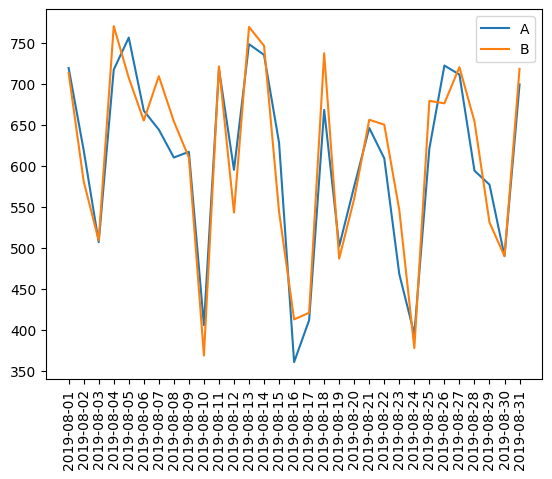

In [10]:
visitorsA = visitors[visitors['group']=='A'][['date', 'visits']]

visitorsB = visitors[visitors['group']=='B'][['date', 'visits']]

# Trazar el gráfico de ingresos del grupo A
plt.plot(visitorsA['date'], visitorsA['visits'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(visitorsB['date'], visitorsB['visits'], label='B')

plt.xticks(rotation='vertical')
plt.legend()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo realizando el cargue y exploración inicial de cada uno de los datasets que serán usados para el desarrollo del proyecto. 
</div>

## Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.



In [11]:
hypotheses['ICE'] = hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']

print(hypotheses[['hypothesis', 'ICE']].sort_values(by = ['ICE'],ascending = False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [12]:
hypotheses['RICE'] = hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']

print(hypotheses[['hypothesis','RICE']].sort_values('RICE', ascending = False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Si se observa en la teoría del ICE y RICE, estos índices se diferencian en el alcance, a mayor alcance mayor RICE. De este análisis matemático, las hipothesis cambian de orden de prioridad porque requieren tendrían mayor alcance, añadir un formulario de suscripción o añadir recomendaciones de producto supondrían un mayor alcance para los usuarios de la tienda, adicionalmente podría notarse que estos cambios requieren menor esfuerzo de implmentación.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo. Aplicas los frameworks RISE e ICE de manera correcta. Adicional a lo anterior, realizas una comparación de los resultados de muy buena manear y genera conclusiones coherentes e interesantes. </div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**Comentario Importante** 
    
~~Hola, Andres. He revisado toda to sección de Análisis de test A/B y realmente luce bien e interesante, ahora bien, me he fijado que antes de desarrollarla no has tenido en cuenta un aspecto importante para que las conclusiones que obtengamos sean las correctas, debes previos al desarrollo de los análisis identificar y eliminar los usuarios que están presentes en los dos grupos. ~~</div>


## Parte 2. Análisis de test A/B
Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

Ejercicio

Analiza el test A/B:

- Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.


In [13]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [14]:
# crea una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders[['date','group']].drop_duplicates()

#  obtén los datos diarios acumulados agregados sobre los pedidos 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
print(ordersAggregated.head(5))

#obtén los datos diarios acumulados agregados sobre los visitantes
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
print(visitorsAggregated.head(5))


          date group  transactionid  visitorid  revenue
55  2019-08-01     A             24         20   2356.8
66  2019-08-01     B             21         20   1620.0
175 2019-08-02     A             44         38   3880.8
173 2019-08-02     B             45         42   4223.3
291 2019-08-03     A             69         63   6011.1
          date group  visits
55  2019-08-01     A     719
66  2019-08-01     B     713
175 2019-08-02     A    1338
173 2019-08-02     B    1294
291 2019-08-03     A    1845


In [15]:
#  fusiona las dos tablas en una y da a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.sample(10))

         date group  orders  buyers  revenue  visitors
54 2019-08-28     A     518     441  60677.7     16970
58 2019-08-30     A     556     469  68529.6     18037
47 2019-08-24     B     494     436  72889.7     14448
55 2019-08-28     B     570     501  80245.3     17177
0  2019-08-01     A      24      20   2356.8       719
14 2019-08-08     A     159     142  14237.9      5239
26 2019-08-14     A     267     237  30880.3      9058
27 2019-08-14     B     309     278  31126.2      9056
36 2019-08-19     A     350     304  39870.2     11629
1  2019-08-01     B      21      20   1620.0       713


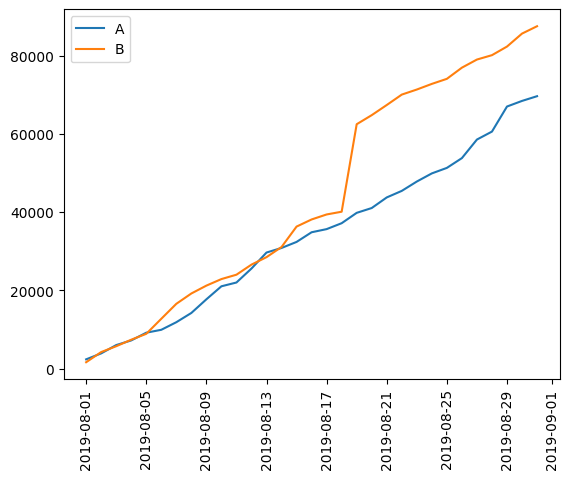

In [16]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation='vertical')
plt.legend()

Los ingresos aumentan constantemente durante toda la prueba. Sin embargo, podemos ver que en el grupo B, existe un alza repentina, lo cual implica un aumento en el número de pedidos o la existencia de pedidos muy caros en la muestra.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo del gráfico de ingresos acumulados por grupo. </div>

- Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.


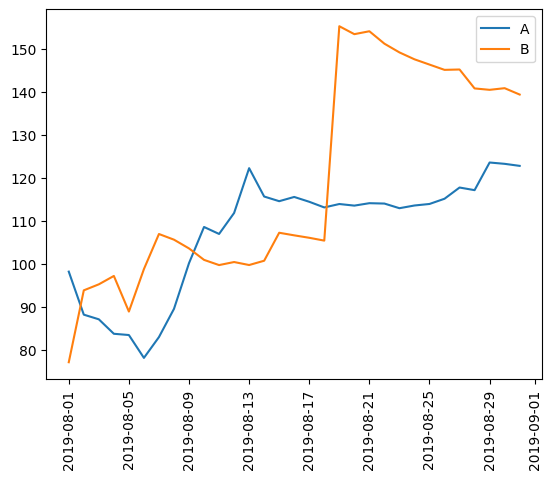

In [17]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation='vertical')
plt.legend()

El tamaño de compra promedio también se estabiliza al final de la prueba en el grupo A pero va cayendo para el grupo B. Necesitamos más datos sobre este grupo para encontrar el verdadero tamaño promedio de compra.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo del gráfico de tamaño de pedido promedio acumulado por grupo. </div>

- Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.


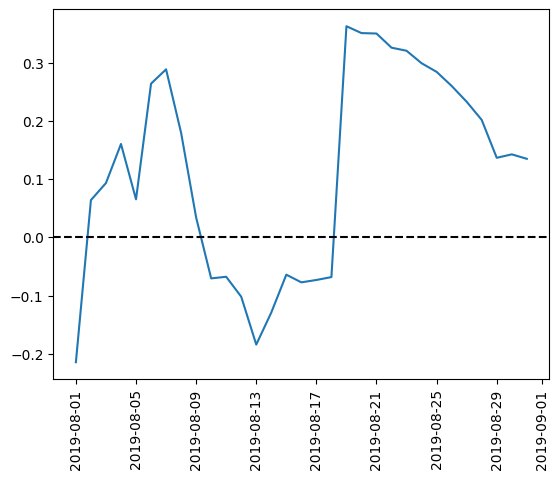

In [37]:
# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation='vertical')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
~~Buen trabajo realizando la gráfica de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Lo único que te puedo recomendar en este caso es que uses el método ``plt.show()`` para evitar que se impriman etiquetas innecesarias en pantalla.~~  </div>

<div class="alert alert-block alert-info">
<b>Ok corregido</b> <a class="tocSkip"></a>
</div

<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
Buen trabajo Andres.  </div>

Esta diferencia entre los grupos, nos indica que en el grupo B existen dos picos importantes de compras a lo largo de todo el periodo de tiempo

- Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.


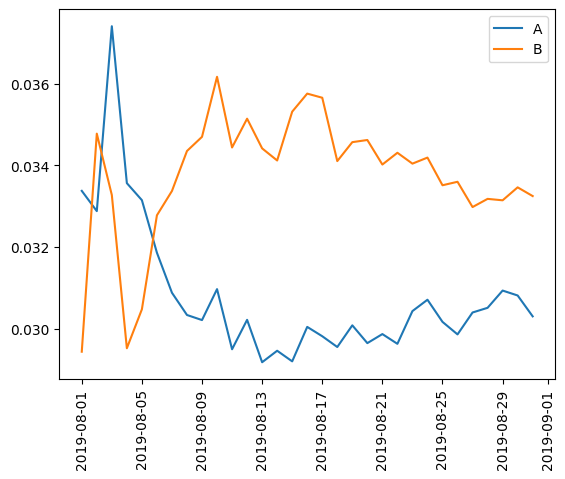

In [36]:
# calcular la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# trazar los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# establecer la escala de los ejes
#plt.axis(["2019-08-01", '2019-08-31', 0, 0.015])

plt.xticks(rotation='vertical')
plt.show()

Los grupos fluctuan al principio pero luego las tasas de conversión se estabilizan, notando siempre que el grupo B está más arriba que el grupo A

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
~~En este caso, buen trabajo con el cálculo y grafico de la tasa de conversión entre grupos. Simplemente, podrías tener en cuenta nuevamente el consejo del método ``plt.show()``.~~ </div>

<div class="alert alert-block alert-info">
<b>Ok corregido</b> <a class="tocSkip"></a>
</div

<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
Buen trabajo Andres.  </div>


- Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.


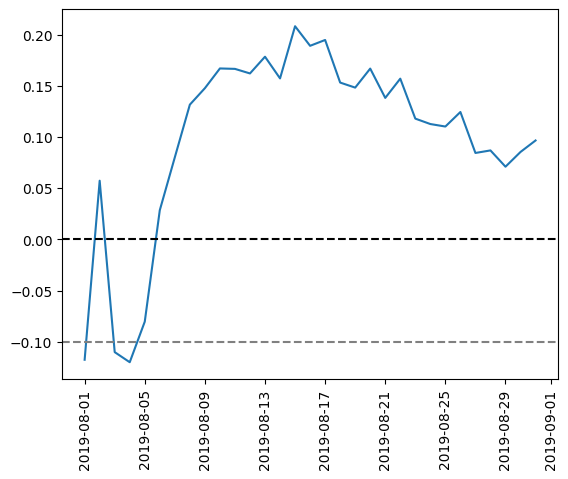

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation='vertical')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
~~Buen trabajo desarrollando el grafico pero ten en cuenta el consejo del ``plt.show()``.~~ </div>

<div class="alert alert-block alert-info">
<b>Ok corregido</b> <a class="tocSkip"></a>
</div

<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
Buen trabajo Andres.  </div>

De la misma manera este gráfico indica que el grupo B siempre tiene una ventaja sobre el grupo A

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

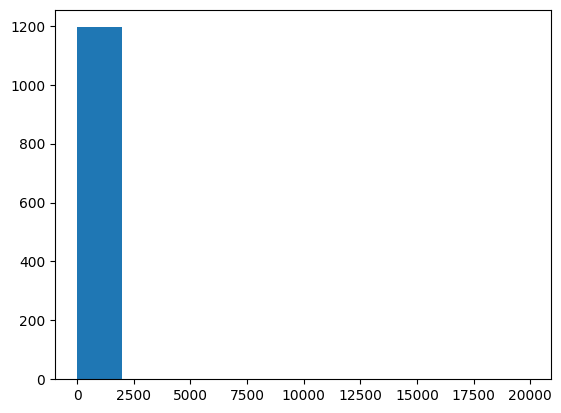

In [21]:
plt.hist(orders['revenue'])
x_values = pd.Series(range(0, len(orders['revenue'])))
orders['revenue'].describe()

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo.  </div>

Se etecta que existe un valor atípico de 19920 reflejado en el valor máximo del revenue

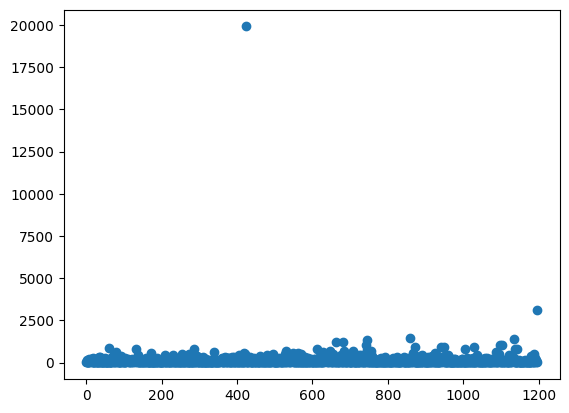

In [22]:
plt.scatter(x_values, orders['revenue'])

Este gráfico scatter confirma lo dicho anteriormente, adicionando otro revenue con valor aproximado de 2500, mientras que el promedio es 131 y la mediana es 50.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
BUen trabajo con el grafico de dispersión via scatter del precio de los pedidos. </div>

- Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [23]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[282.48  435.54  900.904]


<AxesSubplot:>

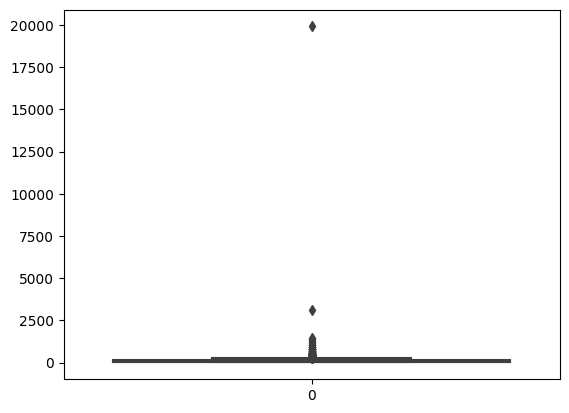

In [24]:
sns.boxplot(data=orders['revenue'])

De acuerdo a los datos y al gráfico se considera una anomalía más allá del percentil 99, $900

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el calculo de los percentiles y el desarrollo del boxplot . </div>

- Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.


In [25]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['transactionid', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      transactionid  orders
1023     4256040402      11
591      2458001652      11
569      2378935119       9
487      2038680547       8
44        199603092       5
744      3062433592       5
55        237748145       5
917      3803269165       5
299      1230306981       5
897      3717692402       5


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

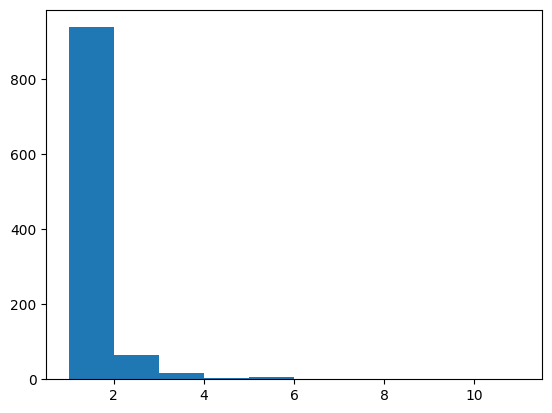

In [26]:
plt.hist(ordersByUsers['orders'])


La mayoría de los clientes hicieron un solo pedido. Sin embargo, una parte significativa hizo de dos a cuatro cada uno.

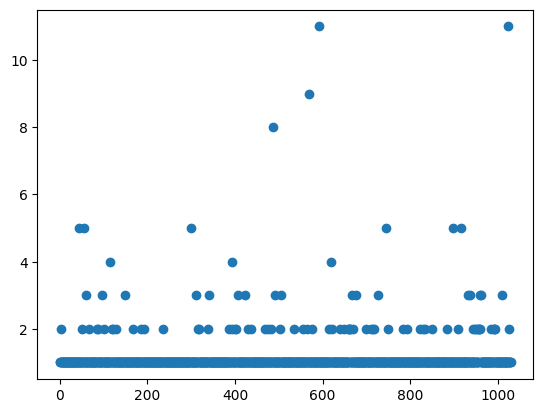

In [27]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

Este gráfico confirma lo dicho anteriormente

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
BUen trabajo con el grafico de dispersión del numero de pedidos por cliente. </div>

- Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [28]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


<AxesSubplot:>

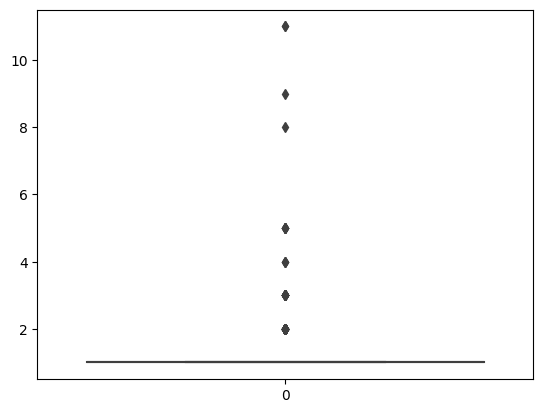

In [29]:
sns.boxplot(data=ordersByUsers['orders'])

Se considerará datos atípicos cuando con compras mayores a 4, es decir en el percentil 99

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el calculo de los percentiles y el desarrollo del boxplot . </div>

- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.


In [30]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.022
0.097


Según los datos sin procesar, si hay diferencia entre los grupos A y B.

La primera fila de la salida nos da el valor p 0.022, que es menor que 0.05. Entonces, podemos rechazar la hipótesis nula ya que hay una diferencia estadísticamente significativa en la conversión entre los grupos. Se define una ganancia relativa del grupo B con el 9,7% (la segunda fila de la salida).

- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.


In [31]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.741
0.135


El valor p es notablemente superior a 0.05 por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos. El tamaño de pedido promedio para el grupo B es mucho más grande que para el grupo A.

- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.


In [32]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 900]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
17      199603092
21      237748145
949     887908475
744     888512513
Name: visitorid, dtype: int64
(21,)


In [33]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.149


Los resultados de conversión han cambiado ligeramente, sin embargo se da la misma conclusión.

- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.


In [34]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.977
-0.047


Se confirma que el ingreso de los grupos difieren, sin embargo con los datos filtrados el tamaño promedio del pedido es similar entre los grupos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo de las secciones de estudio de la significancia estadistica. </div>

## Conclusión final 
- Toma una decisión basada en los resultados de la prueba. 
Las decisiones posibles son: 
1. Para la prueba, considera a uno de los grupos como líder. 
2. Para la prueba, concluye que no hay diferencia entre los grupos. 
3. Continúa la prueba.


Claramente todos los análisis con datos filtrados y en bruto indican que el grupo B tiene una ventaja en ingresos sobre el grupo A.
El tamaño promedio del pedido es similar en los grupos después que se filtraron los datos anómalos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con la sección de conclusión final.</div>